In [1]:
!pip install fredapi

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
plt.style.use('fivethirtyeight')
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']


In [5]:
from fredapi import Fred

In [6]:
frd_key = '37ead530b7c65d77b6ba3f694db6500b'

Creating fred objects

In [7]:
fred = Fred(api_key = frd_key)

Search for economic data

In [8]:
sp_search = fred.search('S&P', order_by = 'popularity')

In [ ]:
sp_search

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2024-06-07,2024-06-07,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2024-06-05,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-06-06 08:44:04-05:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2024-06-07,2024-06-07,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2024-03-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2024-05-28 08:11:02-05:00,88,"For more information regarding the index, plea..."
SP500,SP500,2024-06-07,2024-06-07,S&P 500,2014-06-06,2024-06-04,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-06-05 19:10:58-05:00,83,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2024-06-07,2024-06-07,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2022 CPI-U-RS Adjusted Dollars,2022 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,83,Household data are collected as of March. As ...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2024-06-07,2024-06-07,ICE BofA US High Yield Index Effective Yield,1996-12-31,2024-06-05,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-06-06 08:44:07-05:00,82,This data represents the effective yield of th...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DDDI12SMA156NWDB,DDDI12SMA156NWDB,2024-06-07,2024-06-07,Private Credit by Deposit Money Banks and Othe...,2001-01-01,2020-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2024-05-07 15:28:48-05:00,3,Private credit by deposit money banks and othe...
DDDI01GTA156NWDB,DDDI01GTA156NWDB,2024-06-07,2024-06-07,Private Credit by Deposit Money Banks to GDP f...,1960-01-01,2021-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2024-05-07 15:28:51-05:00,3,The financial resources provided to the privat...
Q03069USQ605NNBR,Q03069USQ605NNBR,2024-06-07,2024-06-07,"Revenue Freight Tons Originated, Less Than Car...",1920-01-01,1943-07-01,Quarterly,Q,Thousands of Tons,Thous. Of Tons,Not Seasonally Adjusted,NSA,2012-08-16 14:05:10-05:00,3,"Source: Interstate Commerce Commission, Data F..."


Pull Raw Data

In [9]:
sp500 = fred.get_series(series_id = 'SP500')

<Axes: title={'center': 'S&P500'}>

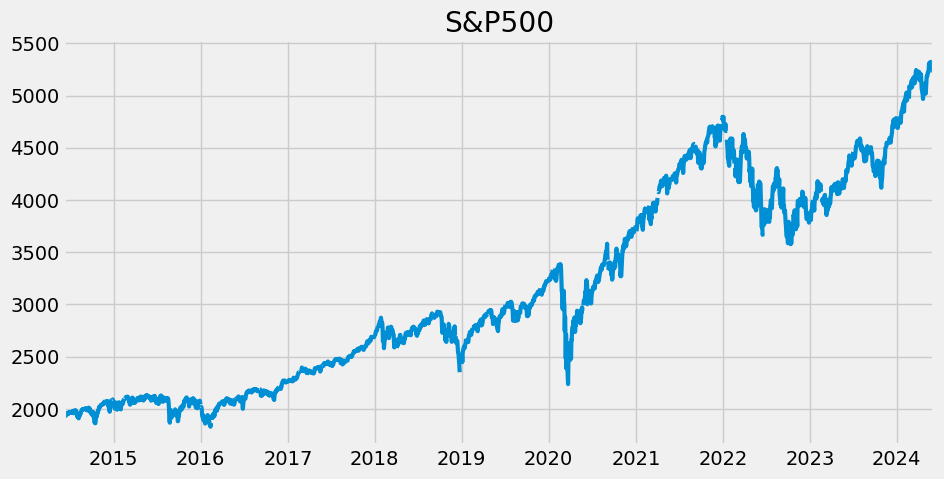

In [10]:
sp500.plot(figsize = (10,5), title = "S&P500", lw = 3)

Pull and Join Multiple data series

In [11]:
unemp_reslt = fred.search('unemployment')

In [ ]:
unemp_reslt.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2024-06-07,2024-06-07,Unemployment Rate,1948-01-01,2024-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-05-03 07:45:01-05:00,95,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2024-06-07,2024-06-07,Unemployment Rate,1948-01-01,2024-04-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-05-03 07:45:27-05:00,58,The unemployment rate represents the number of...
UNEMPLOY,UNEMPLOY,2024-06-07,2024-06-07,Unemployment Level,1948-01-01,2024-04-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2024-05-03 07:45:20-05:00,71,The series comes from the 'Current Population ...
NROU,NROU,2024-06-07,2024-06-07,Noncyclical Rate of Unemployment,1949-01-01,2034-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2024-02-08 14:46:04-06:00,69,"Starting with the July, 2021 report: An Update..."
CCSA,CCSA,2024-06-07,2024-06-07,Continued Claims (Insured Unemployment),1967-01-07,2024-05-25,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2024-06-06 07:33:04-05:00,74,"Continued claims, also referred to as insured ..."


In [12]:
unseries_unem = fred.get_series('UNRATE')

In [13]:
unseries_unem

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2024-01-01    3.7
2024-02-01    3.9
2024-03-01    3.8
2024-04-01    3.9
2024-05-01    4.0
Length: 917, dtype: float64

<Axes: >

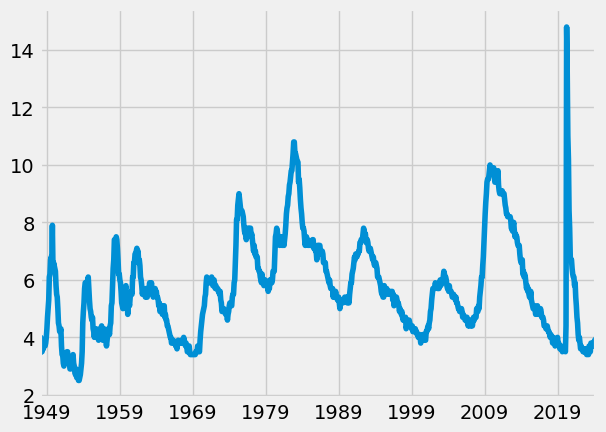

In [14]:
unseries_unem.plot()

In [ ]:
unseries_unem


1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2023-12-01    3.7
2024-01-01    3.7
2024-02-01    3.9
2024-03-01    3.8
2024-04-01    3.9
Length: 916, dtype: float64

In [15]:
unemployment_df = fred.search('unemployment rate state', filter = ('frequency','Monthly'))
unem_df = unemployment_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [ ]:
unemployment_df

In [17]:
unem_df.loc[unem_df['title'].str.contains('Unemployment Rate')]

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2024-06-08,2024-06-08,Unemployment Rate,1948-01-01,2024-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-06-07 07:51:02-05:00,95,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2024-06-08,2024-06-08,Unemployment Rate - Black or African American,1972-01-01,2024-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-06-07 07:51:04-05:00,72,The series comes from the 'Current Population ...
CAUR,CAUR,2024-06-08,2024-06-08,Unemployment Rate in California,1976-01-01,2024-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-05-20 08:14:01-05:00,64,None
TXUR,TXUR,2024-06-08,2024-06-08,Unemployment Rate in Texas,1976-01-01,2024-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-05-20 08:13:02-05:00,56,None
M0892AUSM156SNBR,M0892AUSM156SNBR,2024-06-08,2024-06-08,Unemployment Rate for United States,1929-04-01,1942-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:26:06-05:00,54,Series Is Presented Here As Three Variables--(...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LNS14000048,LNS14000048,2024-06-08,2024-06-08,Unemployment Rate - 25 Yrs. & over,1948-01-01,2024-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-06-07 07:51:43-05:00,6,The series comes from the 'Current Population ...
LNS14000089,LNS14000089,2024-06-08,2024-06-08,Unemployment Rate - 25-34 Yrs.,1948-01-01,2024-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-06-07 07:51:48-05:00,6,The series comes from the 'Current Population ...
M08311USM156SNBR,M08311USM156SNBR,2024-06-08,2024-06-08,"Unemployment Rate, Married Males, Spouse Prese...",1954-11-01,1968-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:28:17-05:00,6,Beginning In 1960 Data Include Alaska And Hawa...


In [18]:
len(unem_df.index)

161

In [19]:
all_results = []
for myid in unem_df.index:
  result = fred.get_series(myid)
  result = result.to_frame(name=myid)
  all_results.append(result)


In [20]:
all_results[3]

,CAUR
1976-01-01,9.2
1976-02-01,9.2
1976-03-01,9.1
1976-04-01,9.1
1976-05-01,9.0
...,...
2023-12-01,5.1
2024-01-01,5.2
2024-02-01,5.3
2024-03-01,5.3


In [78]:
unem_df = unem_df.drop([ 'DCUR'], axis = 0)

In [81]:
unem_df['title'].str.strip("Unemployment Rate in").shape

(51,)

In [74]:
unem_df = unem_df.drop(['U1RATE', 'LNS13023622', 'CSOUUR', 'CNERUR', 'CWSTUR', 'CNEWUR'], axis = 0)

In [52]:
unem_states.columns

Index(['CAUR', 'TXUR', 'NYUR', 'FLUR', 'PAUR', 'OHUR', 'MIUR', 'ALUR', 'MAUR',
       'NCUR', 'ILUR', 'NJUR', 'GAUR', 'COUR', 'AZUR', 'WIUR', 'VAUR', 'KYUR',
       'SCUR', 'NMUR', 'MNUR', 'TNUR', 'WAUR', 'MDUR', 'ORUR', 'WVUR', 'NVUR',
       'ARUR', 'OKUR', 'MOUR', 'AKUR', 'IAUR', 'UTUR', 'PRUR', 'INUR', 'LAUR',
       'HIUR', 'NDUR', 'MTUR', 'DCUR', 'MSUR', 'MEUR', 'NEUR', 'CTUR', 'IDUR',
       'NHUR', 'RIUR', 'KSUR', 'WYUR', 'DEUR', 'VTUR', 'SDUR'],
      dtype='object')

In [53]:
import plotly.express as px

In [54]:
px.line(unem_states)

## Pull April  2020 Unemployment Rate Per State

In [57]:
unem_df.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2024-06-08,2024-06-08,Unemployment Rate,1948-01-01,2024-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-06-07 07:51:02-05:00,95,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2024-06-08,2024-06-08,Unemployment Rate - Black or African American,1972-01-01,2024-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-06-07 07:51:04-05:00,72,The series comes from the 'Current Population ...
U6RATE,U6RATE,2024-06-08,2024-06-08,"Total Unemployed, Plus All Persons Marginally ...",1994-01-01,2024-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-06-07 07:51:08-05:00,67,The series comes from the 'Current Population ...
CAUR,CAUR,2024-06-08,2024-06-08,Unemployment Rate in California,1976-01-01,2024-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-05-20 08:14:01-05:00,64,None
TXUR,TXUR,2024-06-08,2024-06-08,Unemployment Rate in Texas,1976-01-01,2024-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-05-20 08:13:02-05:00,56,None


In [58]:
unem_df['title'].str.strip('Unemployment Rate in')

series id
UNRATE                                                                 
LNS14000006                                   - Black or African Americ
U6RATE                Total Unemployed, Plus All Persons Marginally ...
CAUR                                                            Califor
TXUR                                                              Texas
                                            ...                        
LNS14000150                                                 - Married M
NEIPTERM156SFRBRIC    Hornstein-Kudlyak-Lange Non-Employment Index i...
LBSSA10                      Labor Force Participation Rate for Delawar
LBSSA44                 Labor Force Participation Rate for Rhode Island
LRUN25TTUSM156S       Infra-Annual Labor Statistics: Unemployment Ra...
Name: title, Length: 161, dtype: object

In [101]:
unem_states = unem_states.dropna()

In [84]:
id_to_state = unem_df['title'].str.strip('Unemployment Rate in').to_dict()

In [93]:
unem_states = unem_states.drop(['DCUR'], axis = 1)

In [88]:
id_to_state

{'CAUR': 'Califor',
 'TXUR': 'Texas',
 'NYUR': 'New York',
 'FLUR': 'Florid',
 'PAUR': 'Pennsylv',
 'OHUR': 'Oh',
 'MIUR': 'Michig',
 'ALUR': 'Alab',
 'MAUR': 'Massachusetts',
 'NCUR': 'North Car',
 'ILUR': 'Illinois',
 'NJUR': 'New Jers',
 'GAUR': 'Georg',
 'COUR': 'Colorad',
 'AZUR': 'Ariz',
 'WIUR': 'Wiscons',
 'VAUR': 'Virg',
 'KYUR': 'Kentuck',
 'SCUR': 'South Car',
 'NMUR': 'New Mexic',
 'MNUR': 'Minnes',
 'TNUR': 'Tenness',
 'WAUR': 'Washing',
 'MDUR': 'Maryland',
 'ORUR': 'Oreg',
 'WVUR': 'West Virg',
 'NVUR': 'Nevad',
 'ARUR': 'Arkansas',
 'OKUR': 'Oklah',
 'MOUR': 'Missour',
 'AKUR': 'Alask',
 'IAUR': 'Iow',
 'UTUR': 'h',
 'PRUR': 'Puerto Ric',
 'INUR': 'Ind',
 'LAUR': 'Louis',
 'HIUR': 'Haw',
 'NDUR': 'North Dak',
 'MTUR': 'M',
 'MSUR': 'Mississ',
 'MEUR': 'M',
 'NEUR': 'Nebrask',
 'CTUR': 'Connecticu',
 'IDUR': 'Idah',
 'NHUR': 'New Hampshir',
 'RIUR': 'hode Island',
 'KSUR': 'Kansas',
 'WYUR': 'Wyoming',
 'DEUR': 'Delawar',
 'VTUR': 'Ver',
 'SDUR': 'South Dak'}

In [95]:
unem_states.columns = [id_to_state[c] for c in unem_states.columns]

In [97]:
unem_states = unem_states.dropna()

In [98]:
unem_states

,Califor,Texas,New York,Florid,Pennsylv,Oh,Michig,Alab,Massachusetts,North Car,...,Nebrask,Connecticu,Idah,New Hampshir,hode Island,Kansas,Wyoming,Delawar,Ver,South Dak
1976-01-01,9.2,5.8,10.3,9.7,8.0,8.1,9.9,6.6,10.5,6.4,...,3.3,9.8,5.6,6.5,7.8,4.2,4.1,8.0,8.6,3.3
1976-02-01,9.2,5.8,10.3,9.7,8.1,8.1,9.9,6.6,10.5,6.4,...,3.3,9.8,5.6,6.5,7.8,4.2,4.1,8.0,8.6,3.3
1976-03-01,9.1,5.9,10.2,9.6,8.1,8.1,9.9,6.6,10.5,6.4,...,3.3,9.8,5.6,6.5,7.7,4.2,4.1,8.0,8.6,3.2
1976-04-01,9.1,5.9,10.2,9.5,8.1,8.0,9.8,6.5,10.3,6.3,...,3.2,9.6,5.6,6.5,7.7,4.2,4.0,8.1,8.6,3.1
1976-05-01,9.0,5.9,10.1,9.3,8.1,7.8,9.6,6.4,10.1,6.1,...,3.1,9.4,5.6,6.5,7.7,4.2,3.9,8.3,8.5,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-01,5.1,3.9,4.6,3.1,3.4,3.6,4.1,2.8,3.2,3.6,...,2.5,4.2,3.3,2.6,3.4,2.6,2.9,4.1,2.3,2.1
2024-01-01,5.2,3.9,4.5,3.1,3.4,3.7,4.0,2.9,3.0,3.5,...,2.5,4.4,3.3,2.6,3.6,2.6,2.8,4.1,2.3,2.1
2024-02-01,5.3,3.9,4.4,3.1,3.4,3.7,3.9,3.0,2.9,3.5,...,2.5,4.5,3.3,2.6,3.9,2.7,2.8,4.0,2.3,2.1
2024-03-01,5.3,3.9,4.3,3.2,3.4,3.8,3.9,3.0,2.9,3.5,...,2.5,4.5,3.3,2.6,4.1,2.7,2.8,3.9,2.2,2.1


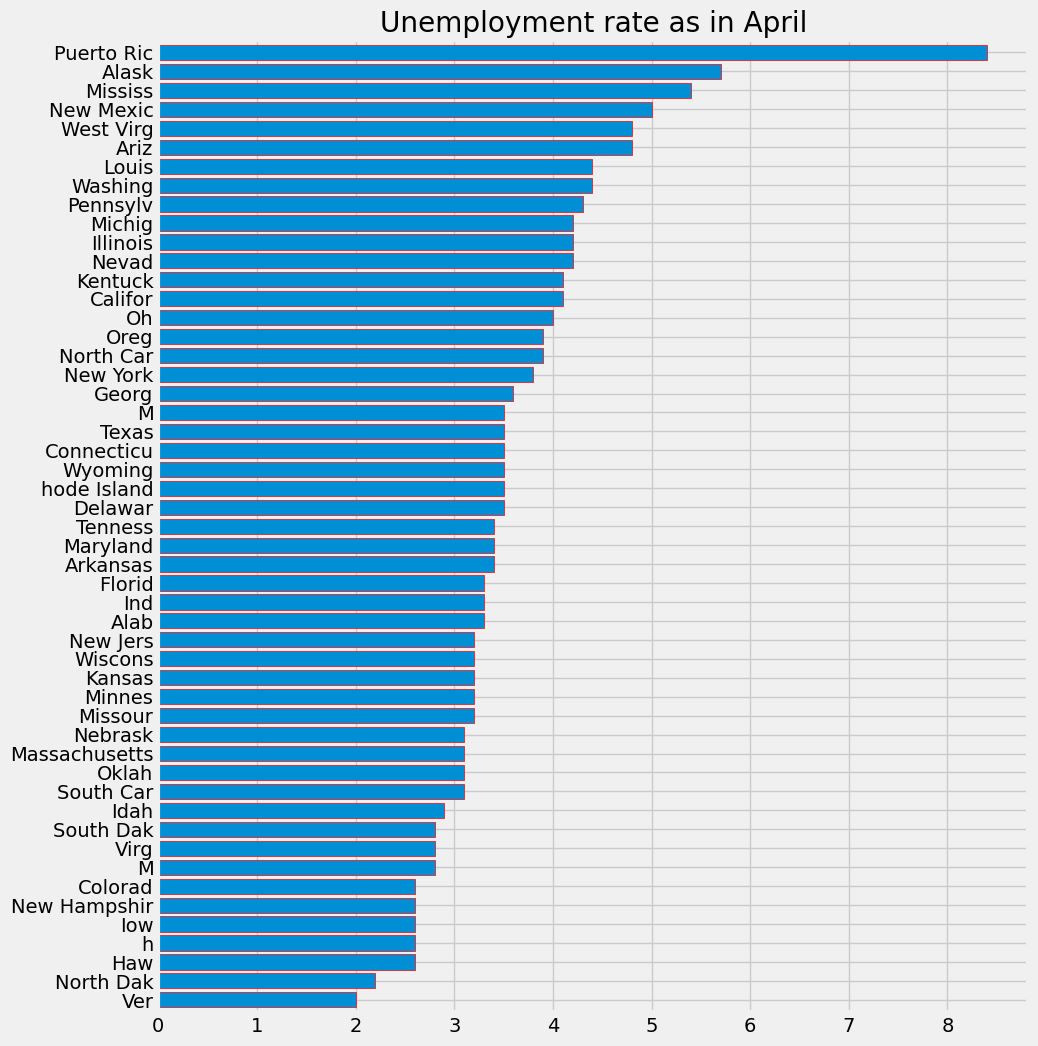

In [111]:
ax = unem_states.loc[unem_states.index == '2019-04-01'].T.sort_values('2019-04-01').plot(kind = 'barh', figsize = (10, 12), width = 0.8,
                                                                                         edgecolor = 'red',
                                                                                         title ="Unemployment rate as in April")
ax = ax.legend().remove()
plt.show()

## Pul Participation Rate

In [119]:
part_df = fred.search('participation rate state', filter = ('frequency','Monthly'))
part_df = unemployment_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [122]:
part_df


,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2024-06-08,2024-06-08,Unemployment Rate,1948-01-01,2024-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-06-07 07:51:02-05:00,95,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2024-06-08,2024-06-08,Unemployment Rate - Black or African American,1972-01-01,2024-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-06-07 07:51:04-05:00,72,The series comes from the 'Current Population ...
U6RATE,U6RATE,2024-06-08,2024-06-08,"Total Unemployed, Plus All Persons Marginally ...",1994-01-01,2024-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-06-07 07:51:08-05:00,67,The series comes from the 'Current Population ...
CAUR,CAUR,2024-06-08,2024-06-08,Unemployment Rate in California,1976-01-01,2024-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-05-20 08:14:01-05:00,64,None
TXUR,TXUR,2024-06-08,2024-06-08,Unemployment Rate in Texas,1976-01-01,2024-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-05-20 08:13:02-05:00,56,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LNS14000150,LNS14000150,2024-06-08,2024-06-08,Unemployment Rate - Married Men,1955-01-01,2024-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-06-07 07:51:42-05:00,5,The series comes from the 'Current Population ...
NEIPTERM156SFRBRIC,NEIPTERM156SFRBRIC,2024-06-08,2024-06-08,Hornstein-Kudlyak-Lange Non-Employment Index i...,1994-01-01,2024-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-05-10 14:18:04-05:00,5,The Hornstein-Kudlyak-Lange Non-Employment Ind...
LBSSA10,LBSSA10,2024-06-08,2024-06-08,Labor Force Participation Rate for Delaware,1976-01-01,2024-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-05-17 09:01:16-05:00,1,A state's labor-force participation rate is th...


In [147]:
part_df.index

Index(['LBSSA06', 'LBSSA01', 'LBSSA36', 'LBSSA26', 'LBSSA28', 'LBSSA48',
       'LBSSA12', 'LBSSA21', 'LBSSA39', 'LBSSA55', 'LBSSA42', 'LBSSA25',
       'LBSSA27', 'LBSSA47', 'LBSSA24', 'LBSSA54', 'LBSSA13', 'LBSSA23',
       'LBSSA17', 'LBSSA22', 'LBSSA08', 'LBSSA37', 'LBSSA45', 'LBSSA49',
       'LBSSA51', 'LBSSA18', 'LBSSA29', 'LBSSA34', 'LBSSA19', 'LBSSA02',
       'LBSSA53', 'LBSSA04', 'LBSSA16', 'LBSSA05', 'LBSSA35', 'LBSSA40',
       'LBSSA31', 'LBSSA15', 'LBSSA32', 'LBSSA30', 'LBSSA41', 'LBSSA50',
       'LBSSA33', 'LBSSA09', 'LBSSA38', 'LBSSA46', 'LBSSA20', 'LBSSA10',
       'LBSSA44'],
      dtype='object', name='series id')

In [153]:
part_to_state = part_df['title'].str.strip('Labor Force Participation Rate for').to_dict()
